In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.applications import ResNet50, Xception, InceptionResNetV2
from tensorflow.keras import layers
from keras.layers.normalization import BatchNormalization
import keras
import dlib
import cv2
from sklearn import preprocessing
from imutils import face_utils
import numpy as np
from keras.optimizers import SGD,Adam
from keras.layers import UpSampling2D
from tensorflow.keras import Model

from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from numpy.random import seed
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
X_train = np.load('/content/drive/MyDrive/DATASETS/X_train_SFEW_192.npy')
y_train = np.load('/content/drive/MyDrive/DATASETS/y_train_SFEW_192.npy')
X_test = np.load('/content/drive/MyDrive/DATASETS/X_test_SFEW_192.npy')
y_test = np.load('/content/drive/MyDrive/DATASETS/y_test_SFEW_192.npy')

In [ ]:
x_train_data = X_train
print(x_train_data.shape)
y_train_data = to_categorical(y_train, 7)
print(y_train_data.shape)
x_test_data = X_test
print(x_test_data.shape)
y_test_data = to_categorical(y_test, 7)
print(y_test_data.shape)

(346, 192, 192, 3)
(346, 7)
(354, 192, 192, 3)
(354, 7)


In [ ]:
from sklearn.model_selection import train_test_split
x_train_final, x_valid_final, y_train_final, y_valid_final = train_test_split(x_train_data, y_train_data, test_size=0.1, random_state=42)

In [ ]:

from keras.models import Sequential, load_model

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(192, 192, 3), activation='relu', padding='same',name='conv192_1'))
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(192,192, 3), activation='relu', padding='same',name='conv192_3'))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',name='conv192_2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='maxpool192_1'))


prior = load_model('/content/drive/MyDrive/DATASETS/test_sfew__96.h5')


for layer in prior.layers[3:]:
    model.add(layer)


for layer in prior.layers[-4:]:
    print(layer)
    layer.trainable = False
from keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:

#sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#callbacks = [ModelCheckpoint(weights, monitor='val_loss', save_best_only=True, verbose=0)]
adam=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr = 1e-4), metrics=['accuracy'])

#model.fit(x_train_data,y_train_data,batch_size = 64,epochs=100)
history = model.fit(x_train_final , y_train_final, batch_size=64,epochs=50,validation_data=(x_valid_final, y_valid_final),verbose=1, use_multiprocessing=True)

#model.fit(X_train, Y_train, batch_size = 1000, nb_epoch = 5, verbose = 1, shuffle = True)


Epoch 1/50
5/5 [==============================] - 13s 911ms/step - loss: 2.3755 - accuracy: 0.1205 - val_loss: 1.8909 - val_accuracy: 0.2571
Epoch 2/50
5/5 [==============================] - 1s 249ms/step - loss: 2.0214 - accuracy: 0.1246 - val_loss: 1.7782 - val_accuracy: 0.2286
Epoch 3/50
5/5 [==============================] - 1s 249ms/step - loss: 1.8743 - accuracy: 0.1792 - val_loss: 1.6930 - val_accuracy: 0.4286
Epoch 4/50
5/5 [==============================] - 1s 251ms/step - loss: 1.7624 - accuracy: 0.3524 - val_loss: 1.6365 - val_accuracy: 0.4571
Epoch 5/50
5/5 [==============================] - 1s 251ms/step - loss: 1.6851 - accuracy: 0.3936 - val_loss: 1.5425 - val_accuracy: 0.4571
Epoch 6/50
5/5 [==============================] - 1s 250ms/step - loss: 1.4885 - accuracy: 0.5695 - val_loss: 1.4517 - val_accuracy: 0.4857
Epoch 7/50
5/5 [==============================] - 1s 251ms/step - loss: 1.3139 - accuracy: 0.6651 - val_loss: 1.3388 - val_accuracy: 0.6286
Epoch 8/50
5/5 [===

In [ ]:
import matplotlib.pyplot as plt             

def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(221)
    plt.plot(history.history['accuracy'], label = "acc")
    plt.plot(history.history['val_accuracy'], label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.subplot(222)
    plt.plot(history.history['loss'] ,label = "loss")
    plt.plot(history.history['val_loss'], label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

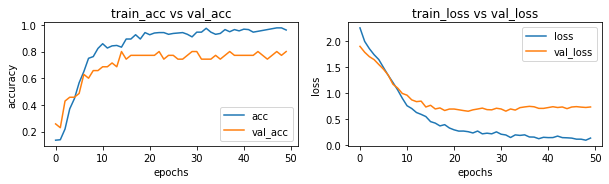

In [ ]:
plot_accuracy_loss(history)

In [ ]:
from sklearn.metrics import classification_report
from keras.models import Sequential, load_model

#model=load_model('/content/drive/MyDrive/DATASETS/test2_48.h5')
model.summary()
predicted = model.predict(X_test)
pred_labels = np.argmax(predicted, axis = 1)
report = classification_report(y_test, pred_labels)
print(report)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv192_1 (Conv2D)           (None, 192, 192, 64)      1792      
_________________________________________________________________
conv192_3 (Conv2D)           (None, 192, 192, 64)      36928     
_________________________________________________________________
conv192_2 (Conv2D)           (None, 192, 192, 32)      18464     
_________________________________________________________________
maxpool192_1 (MaxPooling2D)  (None, 96, 96, 32)        0         
_________________________________________________________________
maxpool96_1 (MaxPooling2D)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 64)        1

In [ ]:
model.save('/content/drive/MyDrive/DATASETS/test_sfew_192.h5')